# SF Salaries Exercise 

Welcome to a quick exercise for you to practice your pandas skills! We will be using the [SF Salaries Dataset](https://www.kaggle.com/kaggle/sf-salaries) from Kaggle! Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

** Import pandas as pd.**

In [80]:
import pandas as pd
import seaborn as sns

** Read Salaries.csv as a dataframe called sal.**

In [81]:
df=pd.read_csv("Salaries.csv")

** Check the head of the DataFrame. **

In [75]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

** Use the .info() method to find out how many entries there are.**

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 13.0+ MB


**What is the average BasePay ?**

In [77]:
df['BasePay'].mean()

66325.4488404877

In [78]:
df['basepay']

KeyError: 'basepay'

** What is the highest amount of OvertimePay in the dataset ? **

In [ ]:
df['OvertimePay'].max()

** What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [79]:
df[df['EmployeeName'] =='JOSEPH DRISCOLL']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
24,25,JOSEPH DRISCOLL,"CAPTAIN, FIRE SUPPRESSION",140546.86,97868.77,31909.28,NaN,270324.91,270324.91,2011,NaN,San Francisco,NaN


In [25]:
df.shape

(148654, 13)

** How much does JOSEPH DRISCOLL make (including benefits)? **

In [32]:
df[df['EmployeeName'] =='JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

** What is the name of highest paid person (including benefits)?**

In [33]:
df['TotalPayBenefits'].max()

567595.43

** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [34]:
df['TotalPayBenefits'].min()

-618.13

** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

In [72]:
a=df.groupby(by='Year')

** How many unique job titles are there? **

In [39]:
df['JobTitle'].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ..., 'Conversion',
       'Cashier 3', 'Not provided'], dtype=object)

** What are the top 5 most common jobs? **

In [40]:
df['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

** How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?) **

In [51]:
sum(df[df['Year']==2013]['JobTitle'].value_counts()==1)

202

** How many people have the word Chief in their job title? (This is pretty tricky) **

In [55]:
def chief_string(title):
    if 'chief' in title.lower().split():
        return True
    else:
        return False

In [57]:
sum(df['JobTitle'].apply(lambda x:chief_string(x)))

477

477

** Bonus: Is there a correlation between length of the Job Title string and Salary? **

In [64]:
df['title_len'] =df['JobTitle'].apply(len)

SyntaxError: invalid syntax (<ipython-input-64-4b9956955f07>, line 1)

In [93]:
df.corr()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
Id,1.000000,-0.204878,-0.081505,-0.100403,-0.348957,-0.211478,-0.092190,0.968171,NaN,NaN
BasePay,-0.204878,1.000000,0.266740,0.285655,0.918028,0.954494,0.946595,0.033751,NaN,NaN
OvertimePay,-0.081505,0.266740,1.000000,0.316592,0.301207,0.504859,0.467981,0.027887,NaN,NaN
OtherPay,-0.100403,0.285655,0.316592,1.000000,0.233178,0.470496,0.422341,-0.002499,NaN,NaN
Benefits,-0.348957,0.918028,0.301207,0.233178,1.000000,0.884097,0.930140,-0.043136,NaN,NaN
TotalPay,-0.211478,0.954494,0.504859,0.470496,0.884097,1.000000,0.977313,0.032090,NaN,NaN
TotalPayBenefits,-0.092190,0.946595,0.467981,0.422341,0.930140,0.977313,1.000000,0.151947,NaN,NaN
Year,0.968171,0.033751,0.027887,-0.002499,-0.043136,0.032090,0.151947,1.000000,NaN,NaN
Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df[['TotalPayBenefits','title_len']].corr()

,TotalPayBenefits,title_len
TotalPayBenefits,1.000000,-0.036878
title_len,-0.036878,1.000000


In [86]:
a=df.corr()

# Great Job!

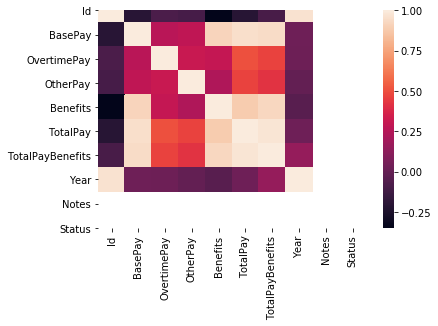

In [85]:
sns.heatmap(df.corr())